In [156]:
import numpy as np
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
housing = pd.DataFrame(pd.read_csv("./Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [158]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
# Define map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to housing list
housing[varlist] = housing[varlist].apply(binary_map)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [159]:
# Splitting Data into Training and Validation Sets
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_train.shape

(436, 13)

In [160]:
df_test.shape

(109, 13)

In [161]:
# Problem 1a
num_vars_1a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_newTrain_1a = df_train[num_vars_1a]
df_newTest_1a = df_test[num_vars_1a]
df_newTrain_1a.head()

,area,bedrooms,bathrooms,stories,parking,price
542,3620,2,1,1,0,1750000
496,4000,2,1,1,0,2695000
484,3040,2,1,1,0,2870000
507,3600,2,1,1,0,2590000
252,9860,3,1,1,0,4515000


In [162]:
def compute_cost(X, y, theta):
 predictions = X.dot(theta) # H = X * Theta 
 errors = np.subtract(predictions, y) # H - Y
 sqrErrors = np.square(errors) # Square of above
 J = 1 / (2 * len(X)) * np.sum(sqrErrors) # Sum of above array, multiply by 1/(2m)
 return J

In [163]:
def gradient_descent(X, y, theta, alpha, iterations, xTest, yTest):
 cost_history = np.zeros(iterations) # Store loss calculations in array to be able to plot gradient descent
 testCost_history = np.zeros(iterations) # Store validation loss
 for i in range(iterations):
    predictions = X.dot(theta) # H = X * Theta
    errors = np.subtract(predictions, y) # H - Y
    derivLoss = (1 / len(X)) * X.transpose().dot(errors); # Finishes derivative of loss calculation
    theta = theta - (alpha * derivLoss); # Calculates for new thetas
    cost_history[i] = compute_cost(X, y, theta) # Stores new cost from the new thetas
    testCost_history[i] = compute_cost(xTest, yTest, theta) # Stores validation cost from new thetas
 return theta, cost_history, testCost_history

In [164]:
m_1a = len(df_newTrain_1a)
testM_1a = len(df_newTest_1a)
m_1a

436

In [165]:
#y_newTrain_1a = df_newTrain_1a.pop('price')
#x_newTrain_1a = df_newTrain_1a.copy()

X0_1a = np.ones((m_1a,1))
testX0_1a = np.ones((testM_1a,1))
X0_1a[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [166]:
X_1a = df_newTrain_1a.values[:,0:5]
y_1a = df_newTrain_1a.values[:,5]

testX_1a = df_newTest_1a.values[:,0:5]
testy_1a = df_newTest_1a.values[:,5]

X = np.hstack((X0_1a, X_1a))
testX = np.hstack((testX0_1a, testX_1a))
X[:10]

array([[1.000e+00, 3.620e+03, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00],
       [1.000e+00, 4.000e+03, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00],
       [1.000e+00, 3.040e+03, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00],
       [1.000e+00, 3.600e+03, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00],
       [1.000e+00, 9.860e+03, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00],
       [1.000e+00, 3.968e+03, 3.000e+00, 1.000e+00, 2.000e+00, 0.000e+00],
       [1.000e+00, 3.840e+03, 3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00],
       [1.000e+00, 9.800e+03, 4.000e+00, 2.000e+00, 2.000e+00, 2.000e+00],
       [1.000e+00, 3.640e+03, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00],
       [1.000e+00, 3.520e+03, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00]])

In [167]:
y_1a[:5]

array([1750000, 2695000, 2870000, 2590000, 4515000], dtype=int64)

In [168]:
thetaX_1a = [0., 0., 0., 0., 0., 0.]
costX_1a = compute_cost(X, y_1a, thetaX_1a)
print('The cost for given values of theta_0, theta_1, theta_2, theta_3, theta_4, and theta5 =', costX_1a)
alphaX_1a = 0.00000001;
iterations = 200;

The cost for given values of theta_0, theta_1, theta_2, theta_3, theta_4, and theta5 = 13234989983633.717


In [169]:
thetaX_1a, costX_1a_history, testCostX_1a_history = gradient_descent(X, y_1a, thetaX_1a, alphaX_1a, iterations, testX, testy_1a)
print('Final value of theta for 1a =', thetaX_1a)
#print('cost_history for 1a =', costX_1a_history)
#print('testCost_history for 1a =', testCostX_1a_history)

Final value of theta for 1a = [8.26427521e-01 8.61034777e+02 3.09868836e+00 1.68933722e+00
 2.58304257e+00 7.84212996e-01]


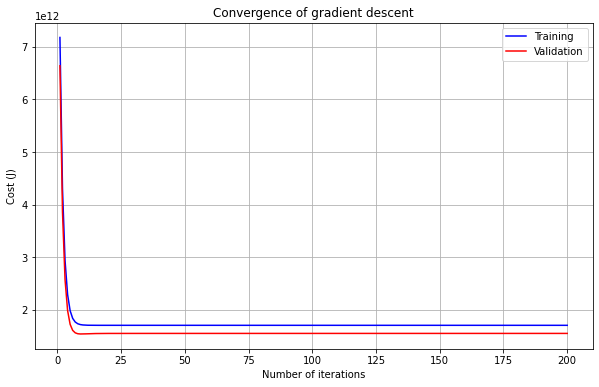

In [170]:
plt.plot(range(1, iterations + 1),costX_1a_history, color='blue', label='Training')
plt.plot(range(1, iterations + 1),testCostX_1a_history, color='red', label='Validation')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend(loc="upper right")

In [171]:
# Problem 1b
num_vars_1b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
df_newTrain_1b = df_train[num_vars_1b]
df_newTest_1b = df_test[num_vars_1b]
df_newTrain_1b.head(10)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
542,3620,2,1,1,1,0,0,0,0,0,0,1750000
496,4000,2,1,1,1,0,0,0,0,0,0,2695000
484,3040,2,1,1,0,0,0,0,0,0,0,2870000
507,3600,2,1,1,1,0,0,0,0,0,0,2590000
252,9860,3,1,1,1,0,0,0,0,0,0,4515000
263,3968,3,1,2,0,0,0,0,0,0,0,4410000
240,3840,3,1,2,1,0,0,0,0,1,1,4585000
175,9800,4,2,2,1,1,0,0,0,2,0,5250000
385,3640,2,1,1,1,0,0,0,0,0,0,3570000
374,3520,2,2,1,1,0,1,0,0,0,0,3640000


In [172]:
m_1b = len(df_newTrain_1b)
testM_1b = len(df_newTest_1b)
m_1b

436

In [173]:
X0_1b = np.ones((m_1b,1))
testX0_1b = np.ones((testM_1b,1))

X_1b = df_newTrain_1b.values[:,0:11]
y_1b = df_newTrain_1b.values[:,11]

testX_1b = df_newTest_1b.values[:,0:11]
testy_1b = df_newTest_1b.values[:,11]

X = np.hstack((X0_1b, X_1b))
testX = np.hstack((testX0_1b, testX_1b))
X[:10]

array([[1.000e+00, 3.620e+03, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 4.000e+03, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 3.040e+03, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 3.600e+03, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 9.860e+03, 3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 3.968e+03, 3.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 3.840e+03, 3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.

In [174]:
thetaX_1b = np.zeros(12)
alphaX_1b = 0.00000001;
iterations = 200;

In [175]:
thetaX_1b, costX_1b_history, testCostX_1b_history = gradient_descent(X, y_1b, thetaX_1b, alphaX_1b, iterations, testX, testy_1b)
print('Final value of theta for 1a =', thetaX_1b)
#print('cost_history for 1a =', costX_1a_history)
#print('testCost_history for 1a =', testCostX_1a_history)

Final value of theta for 1a = [8.26427373e-01 8.61034564e+02 3.09868789e+00 1.68933700e+00
 2.58304225e+00 7.49235626e-01 3.48746484e-01 5.71781420e-01
 1.45670881e-01 6.66373716e-01 7.84212884e-01 3.66320406e-01]


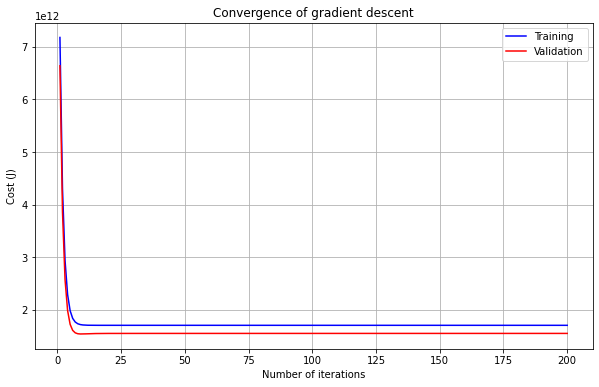

In [176]:
plt.plot(range(1, iterations + 1),costX_1b_history, color='blue', label='Training')
plt.plot(range(1, iterations + 1),testCostX_1b_history, color='red', label='Validation')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend(loc="upper right")